# Music Genres Clustering


### In this lesson, we will group the music according to their genres

<img src=https://promova.com/content/large_music_genres_62a5f91679.png width='400'>

In [1]:
import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",181)
#pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv('Spotify-2000.csv')

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [6]:
print(df.columns)

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')


In [7]:
df = df.drop(['Title','Index','Artist','Top Genre','Length (Duration)'], axis=1)

In [8]:
df

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,94,3,71
1,2000,135,79,50,-11,17,81,17,7,39
2,2001,168,69,66,-9,7,52,2,17,69
3,2007,173,96,43,-4,3,37,0,4,76
4,2002,106,82,58,-5,10,87,1,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,84,7,63
1990,1958,175,76,36,-8,76,95,73,6,69
1991,1959,168,80,53,-9,31,97,74,7,74
1992,1959,174,26,45,-13,7,60,54,4,65


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
wcss=[]
ss=[]
for i in range(2,14):
    model=KMeans(i)
    model=model.fit(df)
    tahmin=model.predict(df)
    ss1=silhouette_score(df,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.24964659776772005
0.1957757197968736
0.18308427465390656
0.1570807717434116
0.15782402746480298
0.15776116199664447
0.1642212500937314
0.14422601638325735
0.1388051482672959
0.13744743070220772
0.12640117907076553
0.1329808619590101


In [11]:
import matplotlib.pyplot as plt

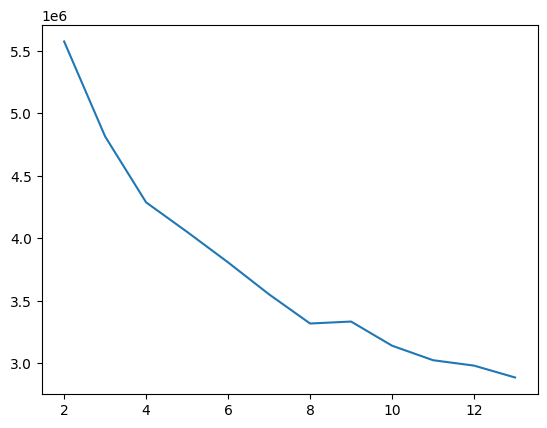

In [12]:
plt.plot(range(2,14),wcss)

In [13]:
from yellowbrick.cluster import KElbowVisualizer

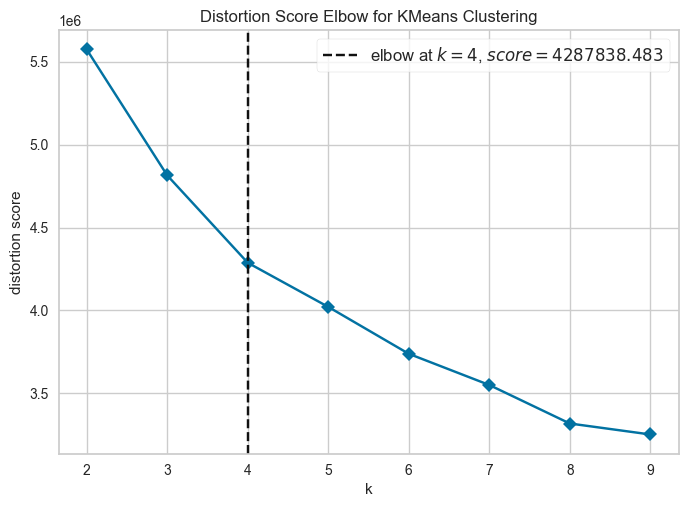

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(df)  
visualizer.show()

In [15]:
silhouette_score(df,tahmin)

0.1329808619590101

In [16]:
model=KMeans(4)

In [17]:
model.fit(df)

KMeans(n_clusters=4)

In [18]:
model=model.fit(df)

In [19]:
tahmin=model.predict(df)

In [20]:
tahmin

array([0, 2, 3, ..., 2, 3, 0], dtype=int32)

In [21]:
df['cluster']=tahmin

In [22]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [23]:
df.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster
0,2004,157,30,53,-14,11,68,94,3,71,0
1,2000,135,79,50,-11,17,81,17,7,39,2
2,2001,168,69,66,-9,7,52,2,17,69,3
3,2007,173,96,43,-4,3,37,0,4,76,3
4,2002,106,82,58,-5,10,87,1,3,59,2


In [24]:
df['cluster'].value_counts()

cluster
2    607
1    514
0    493
3    380
Name: count, dtype: int64

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
data=linkage(df, method='ward', metric='euclidean')

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.figure(figsize=(25,6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

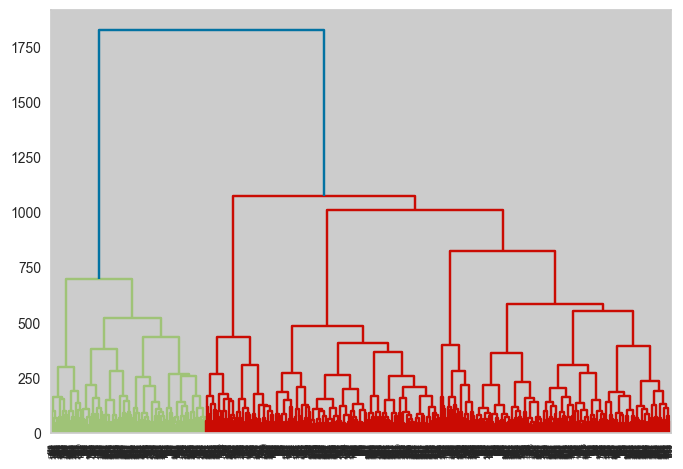

In [29]:
dendrogram(data);

In [30]:
import seaborn as sns

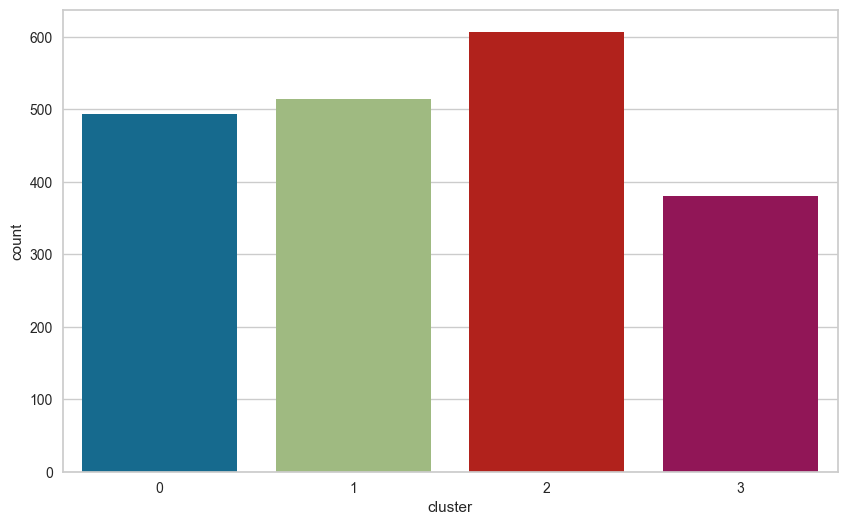

In [31]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x=df['cluster'])
plt.show()

## Our model recommends that we optimally divide it into 4 classes according to KMeans and Yellowbrick 